In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [4]:
n_pts = 500
centers = [[-1,1], [-1,-1], [1,-1]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

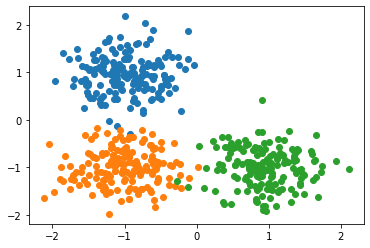

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [7]:
y_cat = to_categorical(y, 3)
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [9]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=X, y=y_cat, verbose=1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 1.4442 - accuracy: 0.4060
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.9540
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9840
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9860
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9860
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9880
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9880
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9880
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9880
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9860
Epoch 11/

In [14]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

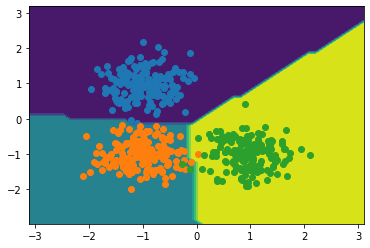

In [16]:
plot_decision_boundary(X,y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])